In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#from google.colab import files
#uploaded = files.upload()

#with open('wiki.txt', 'r') as file:
  #  content = file.read()

In [ ]:


pip install xlrd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
gdp = pd.read_excel(r'gdp new.xls')
manual_headers = ['Country', 'Country Code', 'Indicator Type', 'Indicator Code']
num_columns = len(gdp.columns)
default_headers = [str(year) for year in range(1990, 2018)]

# Assign default headers to the DataFrame
all_headers = manual_headers + default_headers

# Assign headers to the DataFrame columns
gdp.columns = all_headers

# Assuming 'df' is your DataFrame
columns_to_drop = ['Country Code', 'Indicator Type', 'Indicator Code']
gdp.drop(columns=columns_to_drop, inplace=True)

gdp = pd.DataFrame(gdp)

# Reset index and drop the 'index' column if it exists
if 'index' in gdp.columns:
    gdp.drop('index', axis=1, inplace=True)

gdp.reset_index(drop=True, inplace=True)

# Melt the DataFrame to convert years as columns to a single 'Year' column
gdp = gdp.melt(id_vars='Country', var_name='Year', value_name='GDP')

# Display the resulting DataFrame
gdp.sort_values(by=['Year'])

,Country,Year,GDP
0,Aruba,1990,NaN
167,Malaysia,1990,6819.885822
168,North America,1990,23569.691564
169,Namibia,1990,3696.560910
170,New Caledonia,1990,NaN
...,...,...,...
7221,High income,2017,47304.581233
7222,"Hong Kong SAR, China",2017,61540.158311
7223,Honduras,2017,4986.231360
7209,Ghana,2017,4641.323379


In [ ]:
suicideRates = pd.read_csv('crude suicide rates.csv')
first_row = suicideRates.iloc[0]
new_columns = [f"{col}_{val}" for col, val in zip(suicideRates.columns, first_row)]

# Rename the columns with modified names
suicideRates.columns = new_columns

# Remove the first row from the DataFrame
suicideRates = suicideRates.iloc[1:].reset_index(drop=True)
suicideRates = suicideRates.rename(columns={'Unnamed: 0_Country': 'Country','Unnamed: 1_Year': 'Year',
                                              'Crude suicide rates (per 100 000 population)_Both sexes': 'Suicide Rate Both Genders'})
# select only the columns we want to explore
selected_columns = ['Country', 'Year', 'Suicide Rate Both Genders']  # Add the names of the columns you want to keep

suicideRates = suicideRates[selected_columns]

# Display the resulting DataFrame with selected columns
suicideRates.sort_values(by=['Year'])

,Country,Year,Suicide Rate Both Genders
914,Zimbabwe,2000,12.9
344,Guinea,2000,6.3
149,Cameroon,2000,13.3
569,Namibia,2000,10.9
759,South Sudan,2000,4.8
...,...,...,...
690,Samoa,2016,4.4
220,Democratic People's Republic of Korea,2016,11.2
695,Sao Tome and Principe,2016,2.3
700,Saudi Arabia,2016,3.2


In [ ]:
prevalanceSubstanceDisorders = pd.read_csv('share-with-alcohol-and-substance-use-disorders 1990-2016.csv')
prevalanceSubstanceDisorders = prevalanceSubstanceDisorders.rename(columns={'Prevalence - Alcohol and substance use disorders: Both (age-standardized percent) (%)': 'Substance Abuse Both Genders','Entity':'Country'})
prevalanceSubstanceDisorders.sort_values(by=['Year'])

,Country,Code,Year,Substance Abuse Both Genders
0,Afghanistan,AFG,1990,1.530549
2376,High-income Asia Pacific,NaN,1990,1.928670
2403,High-middle SDI,NaN,1990,3.095741
5508,Tonga,TON,1990,1.515001
2430,Honduras,HND,1990,2.056772
...,...,...,...,...
3806,Netherlands,NLD,2016,1.869502
3779,Nepal,NPL,2016,2.067171
3752,Namibia,NAM,2016,2.297560
4049,Northern Mariana Islands,MNP,2016,1.786518


In [ ]:
unemployment = pd.read_excel(r'Unemployment worldbank 1991-2017.xlsx',skiprows=3)

# Set the first row as column headers
column_names = unemployment.iloc[0]
unemployment.columns = column_names

# Drop the first row (as it is now the column headers)
unemployment = unemployment.drop(0)

# Drop unneeded columns
unemployment = unemployment.drop(columns=['Country Code','Indicator Name','Indicator Code'], axis=1).iloc[:, :-1]
unemployment = unemployment.rename(columns={'Country Name':'Country'})
unemployment

# Melt the DataFrame to convert years as rows to a single 'Year' column
unemployment_longitudinal = unemployment.melt(id_vars=['Country'], var_name='Year', value_name='Unemployment Rate')
unemployment_longitudinal.sort_values(by=['Year'])

,Country,Year,Unemployment Rate
0,Aruba,1991,NaN
167,Malaysia,1991,3.76200008392334
168,North America,1991,7.19014281789911
169,Namibia,1991,19.1399993896484
170,New Caledonia,1991,18.9769992828369
...,...,...,...
6957,High income,2017,5.67722241334652
6958,Hong Kong SAR,2017,3.3529999256134
6959,Honduras,2017,4.48600006103516
6945,Ghana,2017,2.35500001907349


In [ ]:
# Ensure the Year values are in the same format
gdp['Year'] = gdp['Year'].astype(str)
suicideRates['Year'] = suicideRates['Year'].astype(str)
prevalanceSubstanceDisorders['Year'] = prevalanceSubstanceDisorders['Year'].astype(str)
unemployment_longitudinal['Year'] = unemployment_longitudinal['Year'].astype(str)

# Merge both DataFrames on the 'Country' and 'Year' columns
mergedData = pd.merge(gdp, suicideRates, on=['Country', 'Year'], how='inner')
mergedData = pd.merge(mergedData, prevalanceSubstanceDisorders[['Country', 'Year', 'Substance Abuse Both Genders']], on=['Country', 'Year'], how='inner')
mergedData = pd.merge(mergedData, unemployment_longitudinal[['Country', 'Year', 'Unemployment Rate']], on=['Country', 'Year'], how='inner')

mergedData = mergedData.dropna()

# modify years included
selectedYears = ['2000','2005','2010','2015','2016']
mergedData = mergedData[mergedData['Year'].isin(selectedYears)]

mergedData = mergedData.dropna()
selectedYears = ['2000','2005','2010','2015','2016']
mergedData = mergedData[mergedData['Year'].isin(selectedYears)]
mergedData['Unemployment Rate'] = pd.to_numeric(mergedData['Unemployment Rate'], errors='coerce')

# Filter rows where the 'Unemployment Rate' column contains NaN values
mergedData = mergedData[~mergedData['Unemployment Rate'].isnull()]
mergedData

,Country,Year,GDP,Suicide Rate Both Genders,Substance Abuse Both Genders,Unemployment Rate
1,Angola,2000,2277.374611,7.9,1.902439,23.733999
2,Albania,2000,4029.016971,5.5,2.163369,22.730000
4,Argentina,2000,11810.061364,9.5,3.537142,15.000000
5,Armenia,2000,2318.238073,3.3,2.277958,11.943000
7,Australia,2000,26316.947878,13.2,4.035073,6.280000
...,...,...,...,...,...,...
755,Vanuatu,2016,3080.565754,4.5,1.577418,5.267000
756,Samoa,2016,6378.256567,4.4,1.586445,8.487000
757,South Africa,2016,13250.588325,11.6,2.169114,26.549999
758,Zambia,2016,3938.663188,6.1,2.143914,7.777000


In [ ]:
#FINDING THE TOP AND BOTTOM COUNTRIES

In [ ]:
#COUNTRY INFO UNEMPLOYMENT RATE

import pandas as pd


# Convert 'Unemployment Rate' column to numeric (assuming it contains numbers or can be converted to numbers)
mergedData['Unemployment Rate'] = pd.to_numeric(mergedData['Unemployment Rate'], errors='coerce')

# Group by 'Country' and calculate the sum of 'Unemployment Rate'
grouped_data_ur = mergedData.groupby('Country')['Unemployment Rate'].sum()
#print(grouped_data_ur)

# Calculate the average unemployment rate for each country
average_unemployment = grouped_data_ur / mergedData.groupby('Country')['Year'].nunique()
#print(average_unemployment)

# Sort countries based on average unemployment rate in descending order
sorted_countries_ur = average_unemployment.sort_values(ascending=False)

# Find the country with the highest and lowest average unemployment rates
country_highest_unemployment = average_unemployment.idxmax()
country_lowest_unemployment = average_unemployment.idxmin()
highest_unemployment_rate = average_unemployment.max()
lowest_unemployment_rate = average_unemployment.min()

# Find the country with the middle unemployment rate
middle_index_ur = len(sorted_countries_ur) // 2
country_middle_unemployment = sorted_countries_ur.index[middle_index_ur]
middle_unemployment_rate = sorted_countries_ur.iloc[middle_index_ur]

print(f"Country with the highest average unemployment rate: {country_highest_unemployment} UR: {highest_unemployment_rate}")
print(f"Country with the lowest average unemployment rate: {country_lowest_unemployment} UR: {lowest_unemployment_rate}")
print(f"Country with the middle average unemployment rate: {country_middle_unemployment} UR: {middle_unemployment_rate}")

# Print the top five and bottom five countries with the highest average unemployment rates
top_five_countries_ur = sorted_countries_ur.head(5)
bottom_five_countries_ur = sorted_countries_ur.tail(5)

print("\nTop five countries with the highest average unemployment rates:")
print(top_five_countries_ur)

print("\nBottom five countries with the highest average unemployment rates:")
print(bottom_five_countries_ur)

# Calculate and print the middle five countries based on average unemployment rates
num_countries_ur = len(sorted_countries_ur)
middle_start_ur = max(0, middle_index_ur - 2)
middle_end_ur = min(num_countries_ur, middle_index_ur + 3)
middle_five_countries_ur = sorted_countries_ur.iloc[middle_start_ur:middle_end_ur]

print("\nMiddle five countries with the highest average unemployment rates:")
print(middle_five_countries_ur)


Country with the highest average unemployment rate: Lesotho UR: 28.15899963378904
Country with the lowest average unemployment rate: Belarus UR: 0.7839999914169307
Country with the middle average unemployment rate: Trinidad and Tobago UR: 6.748600053787226

Top five countries with the highest average unemployment rates:
Country
Lesotho                   28.1590
Bosnia and Herzegovina    27.2196
South Africa              24.7020
Montenegro                23.4530
Mozambique                23.2412
dtype: float64

Bottom five countries with the highest average unemployment rates:
Country
Thailand    1.1794
Qatar       1.1200
Cambodia    1.0392
Myanmar     0.8162
Belarus     0.7840
dtype: float64

Middle five countries with the highest average unemployment rates:
Country
Malawi                 6.7842
Romania                6.7620
Trinidad and Tobago    6.7486
Fiji                   6.6780
Nicaragua              6.3870
dtype: float64


In [ ]:
#COUNTRY INFO GDP

import pandas as pd

# Assuming mergedData is your DataFrame with columns 'Country', 'Year', 'SuicideRate', 'Unemployment Rate'
# Replace these column names with your actual column names

# Convert 'Unemployment Rate' column to numeric (assuming it contains numbers or can be converted to numbers)
mergedData['GDP'] = pd.to_numeric(mergedData['GDP'], errors='coerce')

# Group by 'Country' and calculate the sum of 'Unemployment Rate'
grouped_data_gdp = mergedData.groupby('Country')['GDP'].sum()

# Calculate the average unemployment rate for each country
average_gdp = grouped_data_gdp / mergedData.groupby('Country')['Year'].nunique()

# Sort countries based on average unemployment rate in descending order
sorted_countries_gdp = average_gdp.sort_values(ascending=False)

# Find the country with the highest and lowest average unemployment rates
country_highest_gdp = average_gdp.idxmax()
country_lowest_gdp = average_gdp.idxmin()
highest_gdp = average_gdp.max()
lowest_gdp = average_gdp.min()

# Find the country with the middle unemployment rate
middle_index_gdp = len(sorted_countries_gdp) // 2
country_middle_gdp = sorted_countries_gdp.index[middle_index_gdp]
middle_gdp = sorted_countries_gdp.iloc[middle_index_gdp]

print(f"Country with the highest average GDP: {country_highest_gdp} GDP: {highest_gdp}")
print(f"Country with the lowest average GDP: {country_lowest_gdp} GDP: {lowest_gdp}")
print(f"Country with the middle average GDP: {country_middle_gdp} GDP: {middle_gdp}")

# Print the top five and bottom five countries with the highest average unemployment rates
top_five_countries_gdp = sorted_countries_gdp.head(5)
bottom_five_countries_gdp = sorted_countries_gdp.tail(5)

print("\nTop five countries with the highest average GDP:")
print(top_five_countries_gdp)

print("\nBottom five countries with the highest average GDP:")
print(bottom_five_countries_gdp)

# Calculate and print the middle five countries based on average unemployment rates
num_countries_gdp = len(sorted_countries_gdp)
middle_start_gdp = max(0, middle_index_gdp - 2)
middle_end_gdp = min(num_countries_gdp, middle_index_gdp + 3)
middle_five_countries_gdp = sorted_countries_gdp.iloc[middle_start_gdp:middle_end_gdp]

print("\nMiddle five countries with the highest average GDP:")
print(middle_five_countries_gdp)



Country with the highest average GDP: Qatar GDP: 112246.92073198082
Country with the lowest average GDP: Liberia GDP: 706.2973760457241
Country with the middle average GDP: Peru GDP: 9456.73199751975

Top five countries with the highest average GDP:
Country
Qatar                   112246.920732
Luxembourg               82832.746735
Kuwait                   71902.033660
United Arab Emirates     70429.057087
Singapore                68593.655078
dtype: float64

Bottom five countries with the highest average GDP:
Country
Mozambique                  882.388220
Niger                       806.138048
Central African Republic    716.840726
Burundi                     713.119823
Liberia                     706.297376
dtype: float64

Middle five countries with the highest average GDP:
Country
Turkmenistan    10518.533958
China            9467.945631
Peru             9456.731998
Tunisia          9427.320583
Ecuador          9074.299163
dtype: float64


In [ ]:
#COUNTRY INFO SUICIDE RATES

import pandas as pd

# Assuming mergedData is your DataFrame with columns 'Country', 'Year', 'SuicideRate', 'Unemployment Rate'
# Replace these column names with your actual column names

# Convert 'Unemployment Rate' column to numeric (assuming it contains numbers or can be converted to numbers)
mergedData['Suicide Rate Both Genders'] = pd.to_numeric(mergedData['Suicide Rate Both Genders'], errors='coerce')

# Group by 'Country' and calculate the sum of 'Unemployment Rate'
grouped_data_sr = mergedData.groupby('Country')['Suicide Rate Both Genders'].sum()

# Calculate the average unemployment rate for each country
average_sr = grouped_data_sr / mergedData.groupby('Country')['Year'].nunique()

# Sort countries based on average unemployment rate in descending order
sorted_countries_sr = average_sr.sort_values(ascending=False)

# Find the country with the highest and lowest average unemployment rates
country_highest_sr = average_sr.idxmax()
country_lowest_sr = average_sr.idxmin()
highest_sr = average_sr.max()
lowest_sr = average_sr.min()

# Find the country with the middle unemployment rate
middle_index_sr = len(sorted_countries_sr) // 2
country_middle_sr = sorted_countries_sr.index[middle_index_sr]
middle_sr = sorted_countries_sr.iloc[middle_index_sr]

print(f"Country with the highest average Suicide Rate: {country_highest_sr} SR: {highest_sr}")
print(f"Country with the lowest average Suicide Rate: {country_lowest_sr} SR: {lowest_sr}")
print(f"Country with the middle average Suicide Rate: {country_middle_sr} SR: {middle_sr}")


# Print the top five and bottom five countries with the highest average unemployment rates
top_five_countries_sr= sorted_countries_sr.head(5)
bottom_five_countries_sr = sorted_countries_sr.tail(5)

print("\nTop five countries with the highest average Suicide Rate:")
print(top_five_countries_sr)

print("\nBottom five countries with the highest average Suicide Rate:")
print(bottom_five_countries_sr)

# Calculate and print the middle five countries based on average unemployment rates
num_countries_sr = len(sorted_countries_sr)
middle_start_sr = max(0, middle_index_sr - 2)
middle_end_sr = min(num_countries_sr, middle_index_sr + 3)
middle_five_countries_sr = sorted_countries_sr.iloc[middle_start_sr:middle_end_sr]

print("\nMiddle five countries with the highest average Suicide Rate:")
print(middle_five_countries_sr)


Country with the highest average Suicide Rate: Lithuania SR: 39.739999999999995
Country with the lowest average Suicide Rate: Barbados SR: 1.8800000000000001
Country with the middle average Suicide Rate: Sudan SR: 8.08

Top five countries with the highest average Suicide Rate:
Country
Lithuania     39.740
Belarus       35.780
Kazakhstan    29.875
Ukraine       28.800
Guyana        26.580
dtype: float64

Bottom five countries with the highest average Suicide Rate:
Country
Honduras                 2.60
Kuwait                   2.16
Jamaica                  2.10
Sao Tome and Principe    2.10
Barbados                 1.88
dtype: float64

Middle five countries with the highest average Suicide Rate:
Country
Turkmenistan    8.46
Spain           8.10
Sudan           8.08
Ecuador         8.04
Costa Rica      7.92
dtype: float64


In [ ]:
#COUNTRY INFO SUBSTANCE AND ALCOHOL ABUSE

import pandas as pd

# Assuming mergedData is your DataFrame with columns 'Country', 'Year', 'SuicideRate', 'Unemployment Rate'
# Replace these column names with your actual column names

# Convert 'Unemployment Rate' column to numeric (assuming it contains numbers or can be converted to numbers)
mergedData['Substance Abuse Both Genders'] = pd.to_numeric(mergedData['Substance Abuse Both Genders'], errors='coerce')

# Group by 'Country' and calculate the sum of 'Unemployment Rate'
grouped_data_aa = mergedData.groupby('Country')['Substance Abuse Both Genders'].sum()

# Calculate the average unemployment rate for each country
average_aa = grouped_data_aa / mergedData.groupby('Country')['Year'].nunique()

# Sort countries based on average unemployment rate in descending order
sorted_countries_aa = average_aa.sort_values(ascending=False)

# Find the country with the highest and lowest average unemployment rates
country_highest_aa = average_aa.idxmax()
country_lowest_aa = average_aa.idxmin()
highest_aa = average_aa.max()
lowest_aa = average_aa.min()

# Find the country with the middle unemployment rate
middle_index_aa = len(sorted_countries_aa) // 2
country_middle_aa = sorted_countries_aa.index[middle_index_aa]
middle_aa = sorted_countries_aa.iloc[middle_index_aa]

print(f"Country with the highest average Substance Abuse: {country_highest_aa} SR: {highest_aa}")
print(f"Country with the lowest average Substance Abuse: {country_lowest_aa} SR: {lowest_aa}")
print(f"Country with the middle average Substance Abuse: {country_middle_aa} SR: {middle_aa}")

# Print the top five and bottom five countries with the highest average unemployment rates
top_five_countries_aa= sorted_countries_aa.head(5)
bottom_five_countries_aa = sorted_countries_aa.tail(5)

print("\nTop five countries with the highest average Substance Abuse:")
print(top_five_countries_aa)

print("\nBottom five countries with the highest average Substance Abuse:")
print(bottom_five_countries_aa)

# Calculate and print the middle five countries based on average unemployment rates
num_countries_aa = len(sorted_countries_aa)
middle_start_aa = max(0, middle_index_aa - 2)
middle_end_aa = min(num_countries_aa, middle_index_aa + 3)
middle_five_countries_aa = sorted_countries_aa.iloc[middle_start_aa:middle_end_aa]

print("\nMiddle five countries with the highest average Substance Abuse:")
print(middle_five_countries_aa)



Country with the highest average Substance Abuse: Estonia SR: 5.624779628800001
Country with the lowest average Substance Abuse: Indonesia SR: 1.2526494348
Country with the middle average Substance Abuse: Uruguay SR: 2.0140313264

Top five countries with the highest average Substance Abuse:
Country
Estonia      5.624780
Belarus      5.036102
Ukraine      4.998085
Latvia       4.872923
Lithuania    4.672590
dtype: float64

Bottom five countries with the highest average Substance Abuse:
Country
Saudi Arabia    1.405031
Sudan           1.379936
Israel          1.325994
Morocco         1.271365
Indonesia       1.252649
dtype: float64

Middle five countries with the highest average Substance Abuse:
Country
Equatorial Guinea    2.040031
Burundi              2.028002
Uruguay              2.014031
Nepal                2.007170
China                2.005405
dtype: float64


In [ ]:
#VISUALIZATIONS

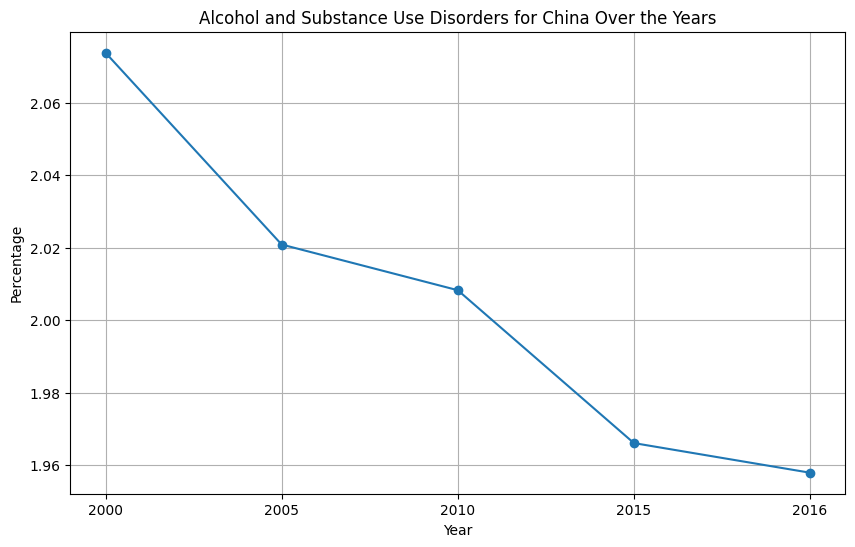

In [ ]:
#Substance Abuse Visualization

import pandas as pd
import matplotlib.pyplot as plt

def plot_country_data(df, country_name):
    # Filter rows based on the specified country
    country_data = df[df['Country'] == country_name]
   # print(country_data)
    if country_data.empty:
        print(f"No data found for {country_name}")
        return

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Substance Abuse Both Genders'], marker='o')
    plt.title(f'Alcohol and Substance Use Disorders for {country_name} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.grid(True)
    plt.show()


country_to_plot = 'China'
plot_country_data(mergedData, country_to_plot)


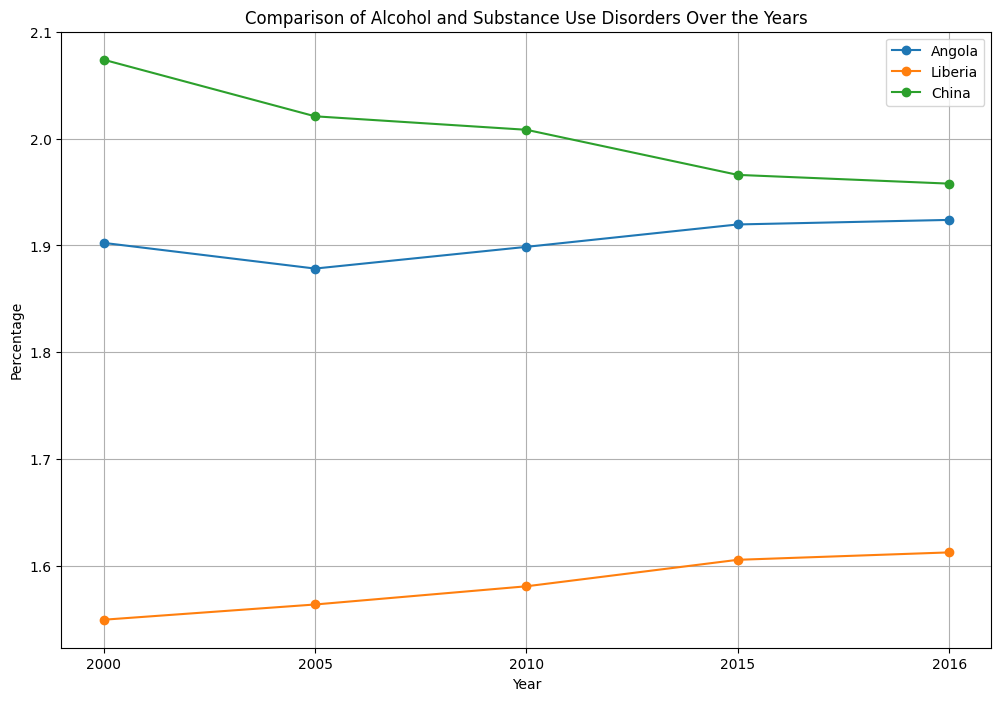

In [ ]:
#Substance Abuse Visualization -- between countries

import pandas as pd
import matplotlib.pyplot as plt

def plot_countries_data(df, country_names):
    plt.figure(figsize=(12, 8))

    for country_name in country_names:
        # Filter rows based on the specified country
        country_data = df[df['Country'] == country_name]

        if country_data.empty:
            print(f"No data found for {country_name}")
            continue

        # Plotting for each country
        plt.plot(country_data['Year'], country_data['Substance Abuse Both Genders'], label=country_name, marker='o')

    # Plotting settings
    plt.title('Comparison of Alcohol and Substance Use Disorders Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()

countries_to_compare = ['Angola', 'Liberia', 'China']
plot_countries_data(mergedData, countries_to_compare)


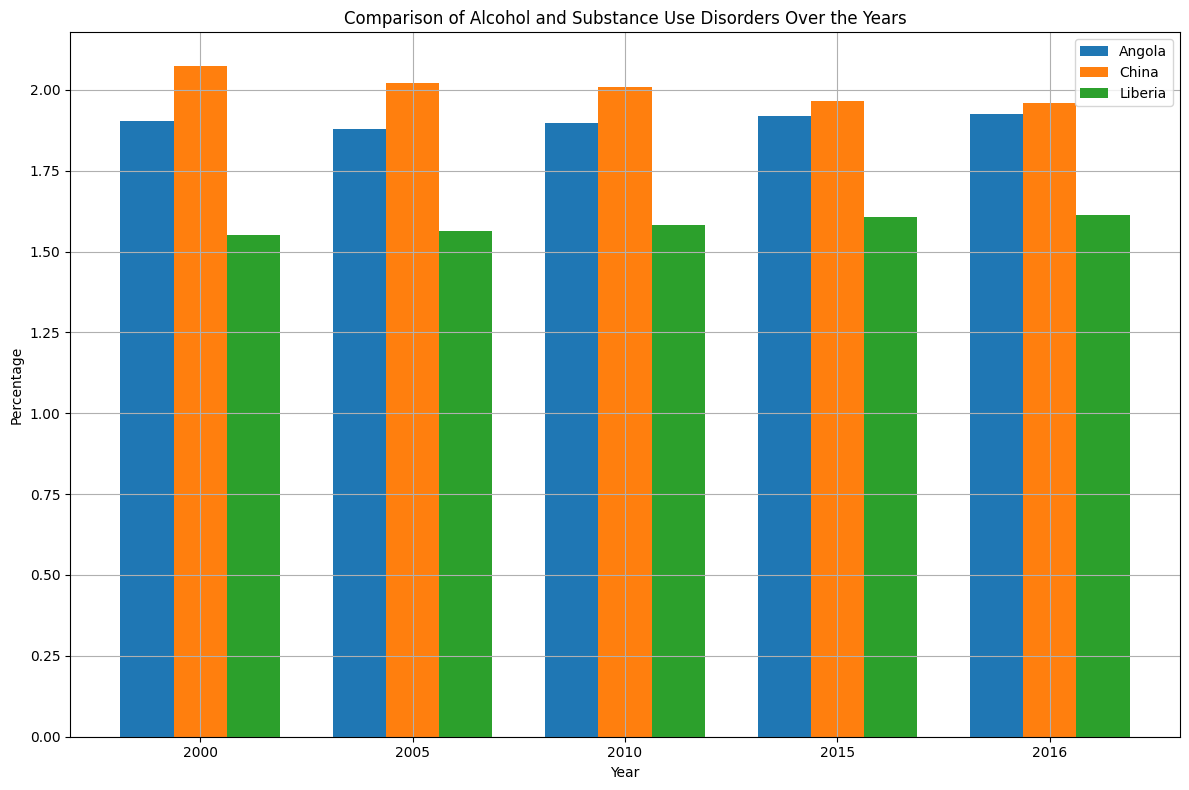

In [ ]:
def plot_countries_data_bar(df, country_names):
    filtered_df = df[df['Country'].isin(country_names)]

    # Prepare a grouped DataFrame by year and country
    grouped_data = filtered_df.groupby(['Year', 'Country']).mean().reset_index()

    # Get unique years and countries
    years = grouped_data['Year'].unique()
    countries = grouped_data['Country'].unique()

    # Set the width of the bars
    bar_width = 0.25

    # Set initial index for x position of bars
    index = pd.Series(range(len(years)))

    # Plotting
    plt.figure(figsize=(12, 8))

    for i, country in enumerate(countries):
        country_data = grouped_data[grouped_data['Country'] == country]

        # Adjust the position of bars for each country
        plt.bar(index + i * bar_width, country_data['Substance Abuse Both Genders'],
                bar_width, label=country)

    # Set x-axis labels as years
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.title('Comparison of Alcohol and Substance Use Disorders Over the Years')
    plt.xticks(index + bar_width * (len(countries) - 1) / 2, years)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


countries_to_compare = ['Angola', 'Liberia', 'China']
plot_countries_data_bar(mergedData, countries_to_compare)


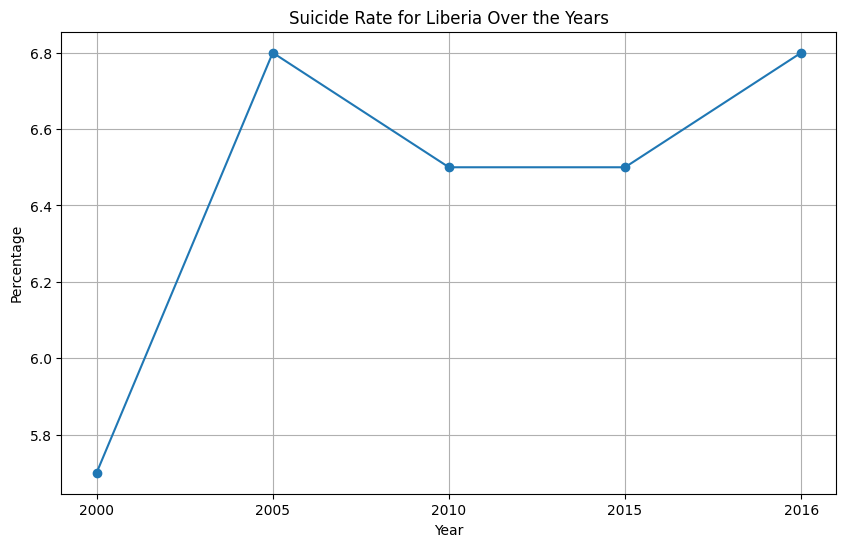

In [ ]:
#Suicide Rates w/ Merged Data


import pandas as pd
import matplotlib.pyplot as plt

def plot_country_data(df, country_name):
    # Filter rows based on the specified country
    country_data = df[df['Country'] == country_name]
    if country_data.empty:
        print(f"No data found for {country_name}")
        return
    # Sort the data by 'Year'
    country_data = country_data.sort_values(by='Year')

    # Convert 'Suicide Rate Both Genders' to numeric
    country_data['Suicide Rate Both Genders'] = pd.to_numeric(country_data['Suicide Rate Both Genders'], errors='coerce')

    # Plotting for each country
    #plt.plot(country_data['Year'], country_data['Suicide Rate Both Genders'], label=country_name, marker='o')

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Suicide Rate Both Genders'], marker='o')
    plt.title(f'Suicide Rate for {country_name} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.grid(True)
    plt.show()

# Assuming 'merged_data' is your new DataFrame
# Replace 'Your Country' with the country name you want to plot
country_to_plot = 'Liberia'

plot_country_data(mergedData, country_to_plot)

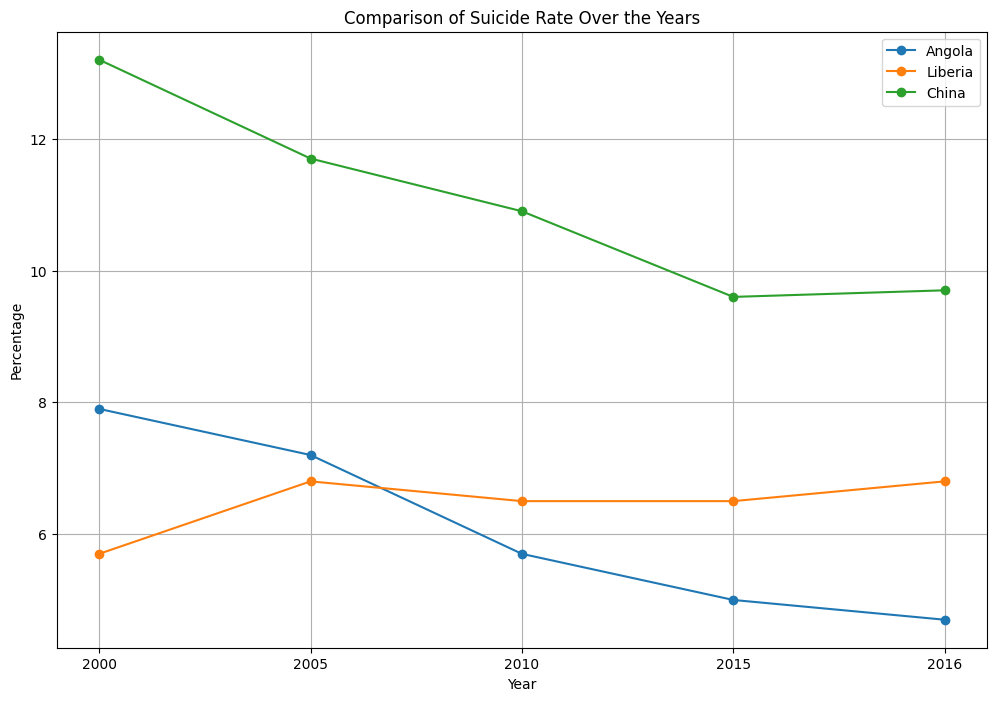

In [ ]:
#Comparison of Suicide Rates w/ Merged Data

import pandas as pd
import matplotlib.pyplot as plt

def plot_countries_data(df, country_names):
    plt.figure(figsize=(12, 8))

    for country_name in country_names:
        # Filter rows based on the specified country
        country_data = df[df['Country'] == country_name]

        if country_data.empty:
            print(f"No data found for {country_name}")
            continue

        # Sort the data by 'Year'
        country_data = country_data.sort_values(by='Year')

        # Convert 'Suicide Rate Both Genders' to numeric
        country_data['Suicide Rate Both Genders'] = pd.to_numeric(country_data['Suicide Rate Both Genders'], errors='coerce')

        # Plotting for each country
        plt.plot(country_data['Year'], country_data['Suicide Rate Both Genders'], label=country_name, marker='o')

    # Plotting settings
    plt.title('Comparison of Suicide Rate Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'merged_data' is your new DataFrame
# Replace ['Country1', 'Country2', 'Country3'] with the list of countries you want to compare
countries_to_compare = ['Angola', 'Liberia', 'China']

plot_countries_data(mergedData, countries_to_compare)

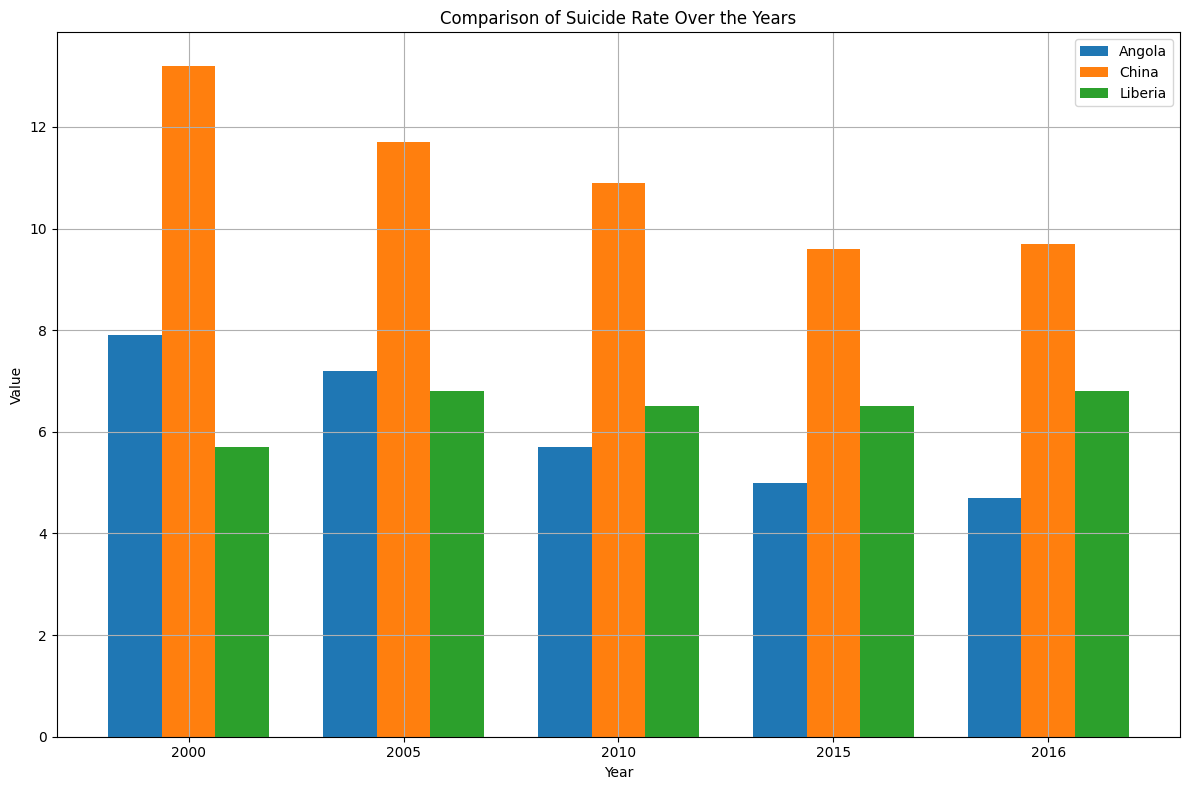

In [ ]:

def plot_countries_data_bar(df, country_names):
    # Filter the DataFrame to include only the specified country names
    filtered_df = df[df['Country'].isin(country_names)]

    # Prepare a grouped DataFrame by year and country
    grouped_data = filtered_df.groupby(['Year', 'Country']).mean().reset_index()

    # Get unique years and countries
    years = grouped_data['Year'].unique()
    countries = grouped_data['Country'].unique()

    # Set the width of the bars
    bar_width = 0.25

    # Set initial index for x position of bars
    index = pd.Series(range(len(years)))

    # Plotting
    plt.figure(figsize=(12, 8))

    for i, country in enumerate(countries):
        country_data = grouped_data[grouped_data['Country'] == country]

        # Adjust the position of bars for each country
        plt.bar(index + i * bar_width, country_data['Suicide Rate Both Genders'],
                bar_width, label=country)

    # Set x-axis labels as years
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Comparison of Suicide Rate Over the Years')
    plt.xticks(index + bar_width * (len(countries) - 1) / 2, years)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

countries_to_compare = ['Angola', 'Liberia', 'China']
plot_countries_data_bar(mergedData, countries_to_compare)

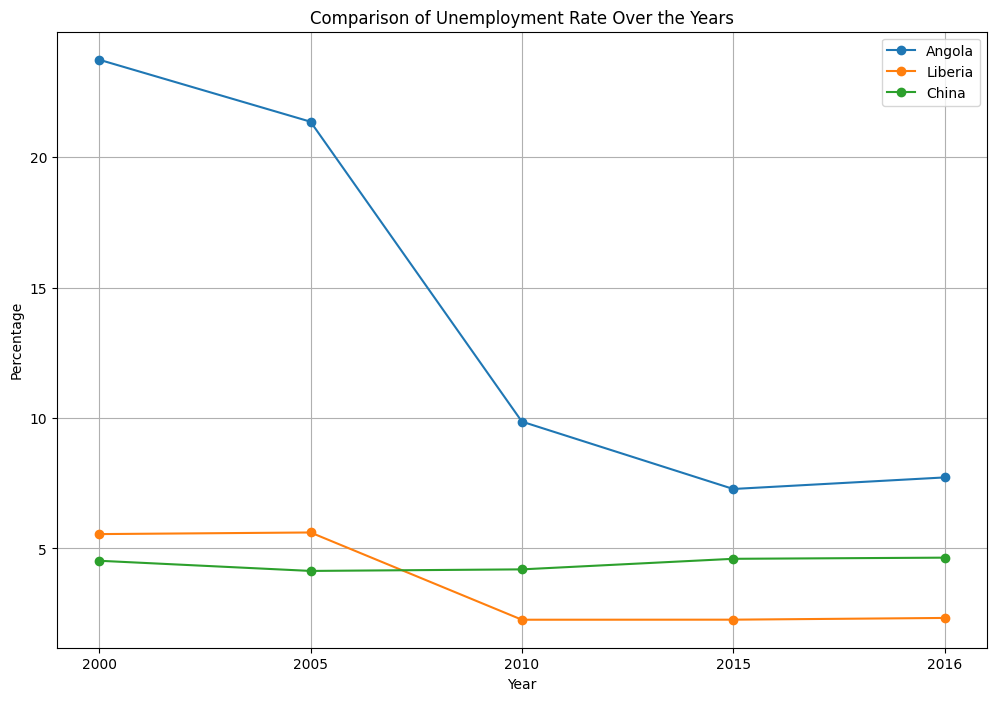

In [ ]:
#Comparison of Suicide Rates w/ Merged Data

import pandas as pd
import matplotlib.pyplot as plt

def plot_countries_data(df, country_names):
    plt.figure(figsize=(12, 8))

    for country_name in country_names:
        # Filter rows based on the specified country
        country_data = df[df['Country'] == country_name]

        if country_data.empty:
            print(f"No data found for {country_name}")
            continue

        # Sort the data by 'Year'
        country_data = country_data.sort_values(by='Year')

        # Convert 'Suicide Rate Both Genders' to numeric
        country_data['Unemployment Rate'] = pd.to_numeric(country_data['Unemployment Rate'], errors='coerce')

        # Plotting for each country
        plt.plot(country_data['Year'], country_data['Unemployment Rate'], label=country_name, marker='o')

    # Plotting settings
    plt.title('Comparison of Unemployment Rate Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'merged_data' is your new DataFrame
# Replace ['Country1', 'Country2', 'Country3'] with the list of countries you want to compare
countries_to_compare = ['Angola', 'Liberia', 'China']

plot_countries_data(mergedData, countries_to_compare)

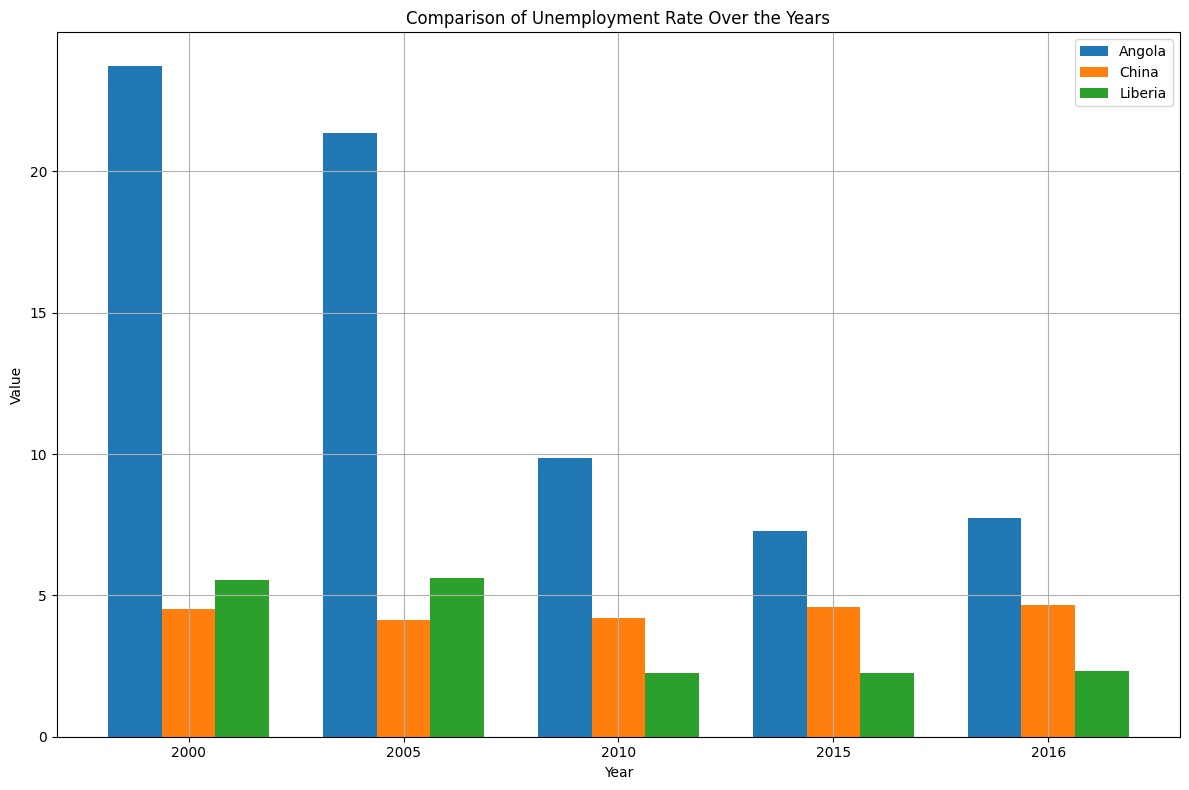

In [ ]:
def plot_countries_data_bar(df, country_names):
    # Filter the DataFrame to include only the specified country names
    filtered_df = df[df['Country'].isin(country_names)]

    # Prepare a grouped DataFrame by year and country
    grouped_data = filtered_df.groupby(['Year', 'Country']).mean().reset_index()

    # Get unique years and countries
    years = grouped_data['Year'].unique()
    countries = grouped_data['Country'].unique()

    # Set the width of the bars
    bar_width = 0.25

    # Set initial index for x position of bars
    index = pd.Series(range(len(years)))

    # Plotting
    plt.figure(figsize=(12, 8))

    for i, country in enumerate(countries):
        country_data = grouped_data[grouped_data['Country'] == country]

        # Adjust the position of bars for each country
        plt.bar(index + i * bar_width, country_data['Unemployment Rate'],
                bar_width, label=country)

    # Set x-axis labels as years
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('Comparison of Unemployment Rate Over the Years')
    plt.xticks(index + bar_width * (len(countries) - 1) / 2, years)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

countries_to_compare = ['Angola', 'Liberia', 'China']
plot_countries_data_bar(mergedData, countries_to_compare)

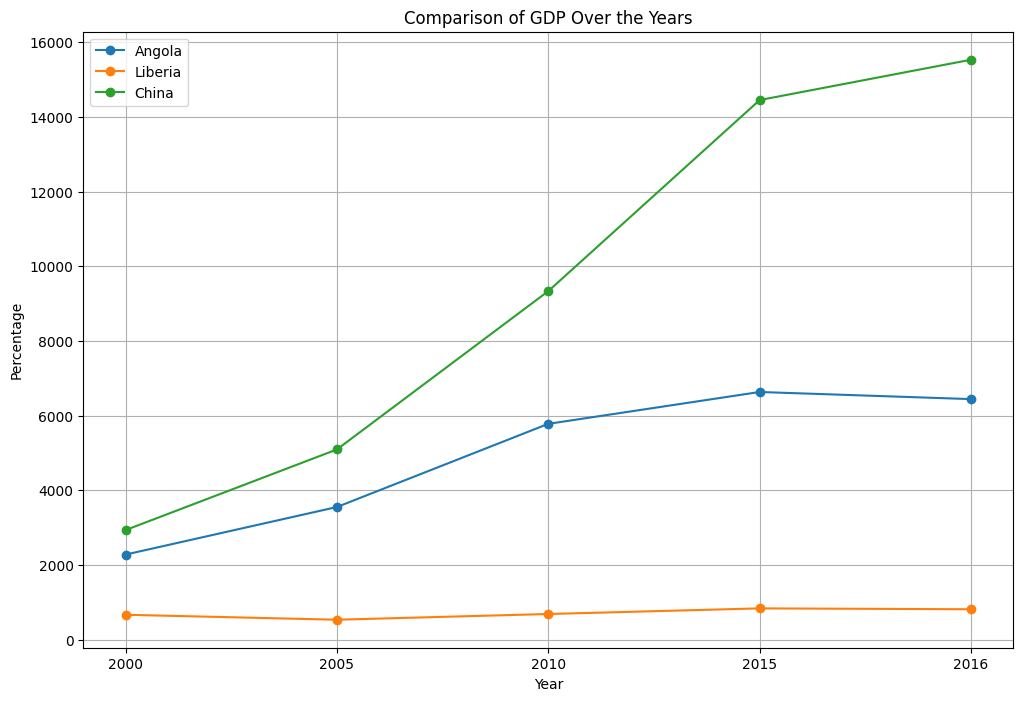

In [ ]:
#GDP -- between countries

import pandas as pd
import matplotlib.pyplot as plt

def plot_countries_data(df, country_names):
    plt.figure(figsize=(12, 8))

    for country_name in country_names:
        # Filter rows based on the specified country
        country_data = df[df['Country'] == country_name]

        if country_data.empty:
            print(f"No data found for {country_name}")
            continue

        # Plotting for each country
        plt.plot(country_data['Year'], country_data['GDP'], label=country_name, marker='o')

    # Plotting settings
    plt.title('Comparison of GDP Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend()
    plt.grid(True)
    plt.show()

countries_to_compare = ['Angola', 'Liberia', 'China']
plot_countries_data(mergedData, countries_to_compare)

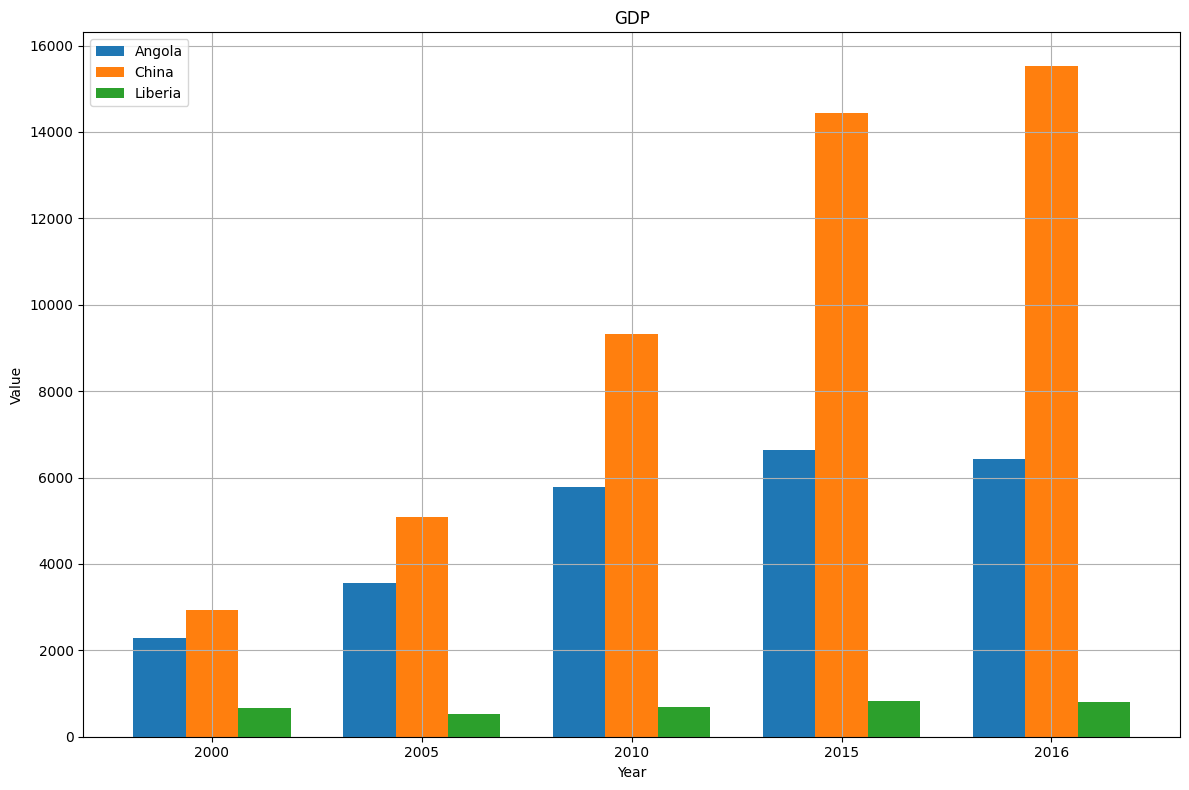

In [ ]:
def plot_countries_data_bar(df, country_names):
    # Filter the DataFrame to include only the specified country names
    filtered_df = df[df['Country'].isin(country_names)]

    # Prepare a grouped DataFrame by year and country
    grouped_data = filtered_df.groupby(['Year', 'Country']).mean().reset_index()

    # Get unique years and countries
    years = grouped_data['Year'].unique()
    countries = grouped_data['Country'].unique()

    # Set the width of the bars
    bar_width = 0.25

    # Set initial index for x position of bars
    index = pd.Series(range(len(years)))

    # Plotting
    plt.figure(figsize=(12, 8))

    for i, country in enumerate(countries):
        country_data = grouped_data[grouped_data['Country'] == country]

        # Adjust the position of bars for each country
        plt.bar(index + i * bar_width, country_data['GDP'],
                bar_width, label=country)

    # Set x-axis labels as years
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.title('GDP')
    plt.xticks(index + bar_width * (len(countries) - 1) / 2, years)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

countries_to_compare = ['Angola', 'Liberia', 'China']
plot_countries_data_bar(mergedData, countries_to_compare)

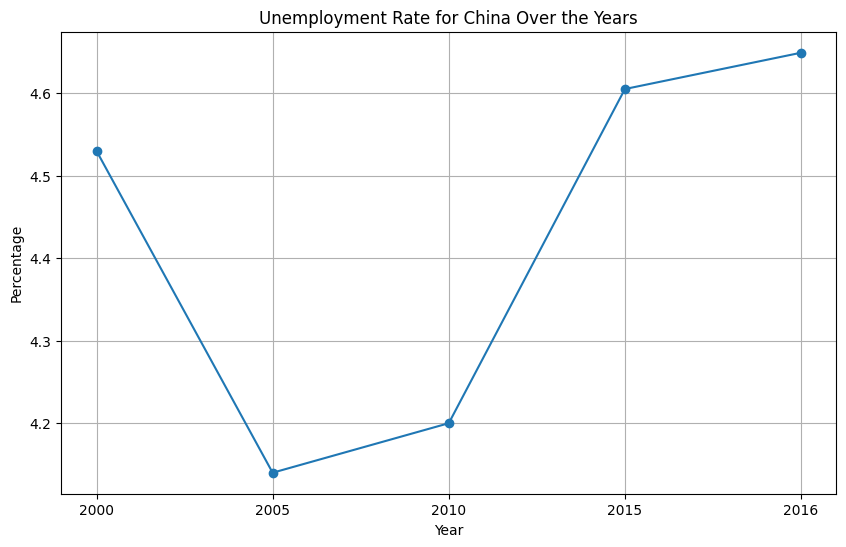

In [ ]:
#Unemployment Rate

def plot_country_data(df, country_name):
    # Filter rows based on the specified country
    country_data = df[df['Country'] == country_name]
    if country_data.empty:
        print(f"No data found for {country_name}")
        return
    # Sort the data by 'Year'
    country_data = country_data.sort_values(by='Year')

    # Convert 'Suicide Rate Both Genders' to numeric
    country_data['Unemployment Rate'] = pd.to_numeric(country_data['Unemployment Rate'], errors='coerce')

    # Plotting for each country
    #plt.plot(country_data['Year'], country_data['Suicide Rate Both Genders'], label=country_name, marker='o')

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(country_data['Year'], country_data['Unemployment Rate'], marker='o')
    plt.title(f'Unemployment Rate for {country_name} Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.grid(True)
    plt.show()

# Assuming 'merged_data' is your new DataFrame
# Replace 'Your Country' with the country name you want to plot
country_to_plot = "China"
plot_country_data(mergedData, country_to_plot)


                      GDP  Suicide Rate  Substance Abuse  Unemployment
GDP              1.000000      0.132266         0.115546     -0.141988
Suicide Rate     0.132266      1.000000         0.589640      0.054462
Substance Abuse  0.115546      0.589640         1.000000      0.115665
Unemployment    -0.141988      0.054462         0.115665      1.000000


<Axes: xlabel='Suicide Rate', ylabel='Substance Abuse'>

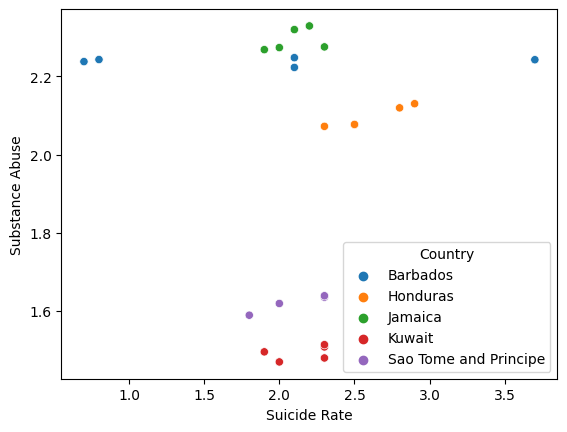

In [ ]:
# building a correlation matrix using mergedData

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Country': mergedData['Country'],
    'Year': mergedData['Year'],
    'GDP': mergedData['GDP'],
    'Suicide Rate': mergedData['Suicide Rate Both Genders'].astype(float),
    'Substance Abuse': mergedData['Substance Abuse Both Genders'],
    'Unemployment': mergedData['Unemployment Rate'],
}

df = pd.DataFrame(data)
correlation = df.corr(numeric_only=True)
print(correlation)

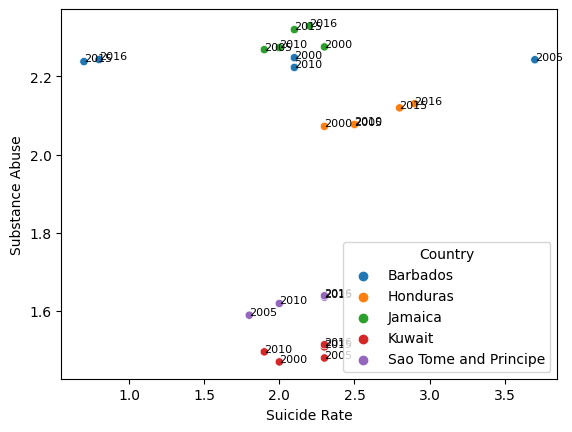

In [ ]:
roi = ['Barbados','Honduras','Jamaica','Kuwait','Sao Tome and Principe']
m = df['Country'].isin(roi)
sns.scatterplot(x='Suicide Rate', y='Substance Abuse', data=df[m], hue='Country')

# Add labels to data points
for index, row in df[m].iterrows():
    plt.text(row['Suicide Rate'], row['Substance Abuse'], row['Year'], ha='left', fontsize=8)

# Show the plot
plt.show()